In [1]:
import kagglehub

# Download latest version
base_dir = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", base_dir)

Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Path to dataset files: /kaggle/input/brain-tumor-classification-mri


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3

In [19]:
train_path = base_dir + '/Training'
test_path = base_dir + '/Testing'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


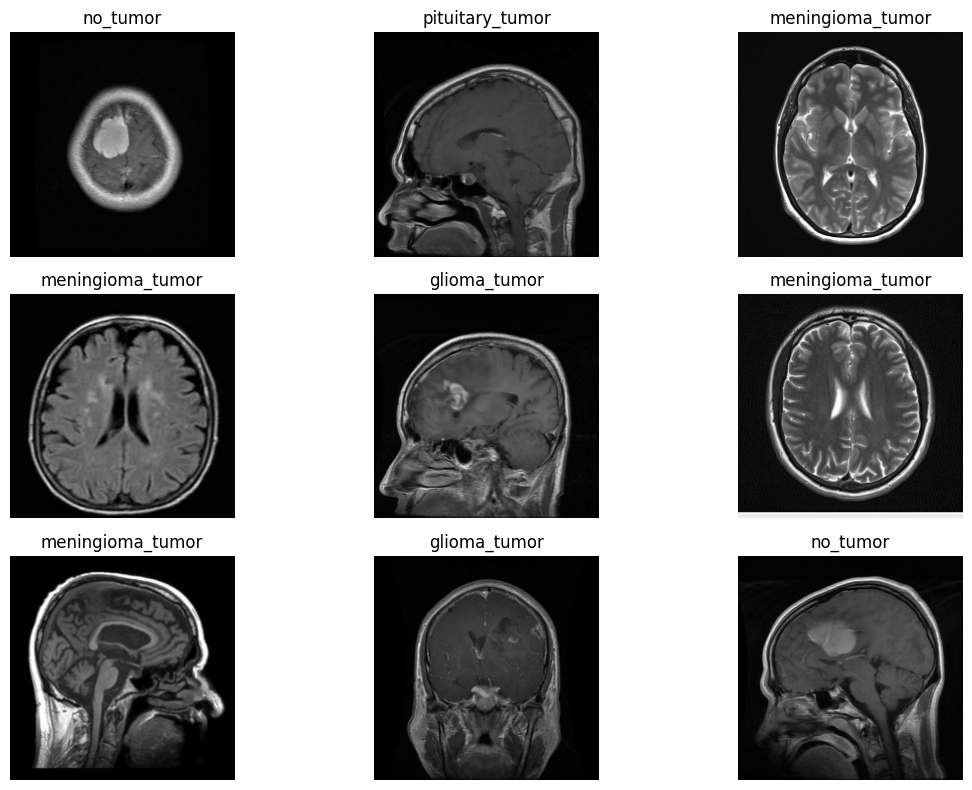

In [24]:


import matplotlib.pyplot as plt

# Get one batch of images and labels
images, labels = next(iter(train_ds))

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [6]:
import numpy as np

X_train = []
y_train = []

for images, labels in train_ds:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())



for images, labels in test_ds:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
class_names = labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'valid',activation = 'relu',input_shape = (224,224,3)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),padding = 'valid',activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),padding = 'valid',activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),padding = 'valid',activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation = 'softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 220, 220, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 108, 108, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 106, 106, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 359552)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    92,045,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,176,772 (351.63 MB)

 Trainable params: 92,176,772 (351.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs = 20,validation_split = 0.1,batch_size = 32)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9725 - loss: 0.0673 - val_accuracy: 0.8401 - val_loss: 0.4585
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9777 - loss: 0.0736 - val_accuracy: 0.8571 - val_loss: 0.4357
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9904 - loss: 0.0357 - val_accuracy: 0.8810 - val_loss: 0.4367
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.9903 - loss: 0.0306 - val_accuracy: 0.8605 - val_loss: 0.4920
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.9924 - loss: 0.0271 - val_accuracy: 0.9014 - val_loss: 0.4201
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.9874 - loss: 0.0317 - val_accuracy: 0.8469 - val_loss: 0.5196
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9876 - loss: 0.0452 - val_accuracy: 0.8912 - val_loss: 0.4509
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9901 - loss: 0.0182 - val_accu

In [17]:
acc,loss = model.evaluate(X_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.9331 - loss: 0.3624


In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=class_names))

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.94      0.92        98
        no_tumor       0.88      0.87      0.87        91
meningioma_tumor       0.96      0.87      0.91        55
 pituitary_tumor       0.97      1.00      0.98        83

        accuracy                           0.92       327
       macro avg       0.93      0.92      0.92       327
    weighted avg       0.92      0.92      0.92       327



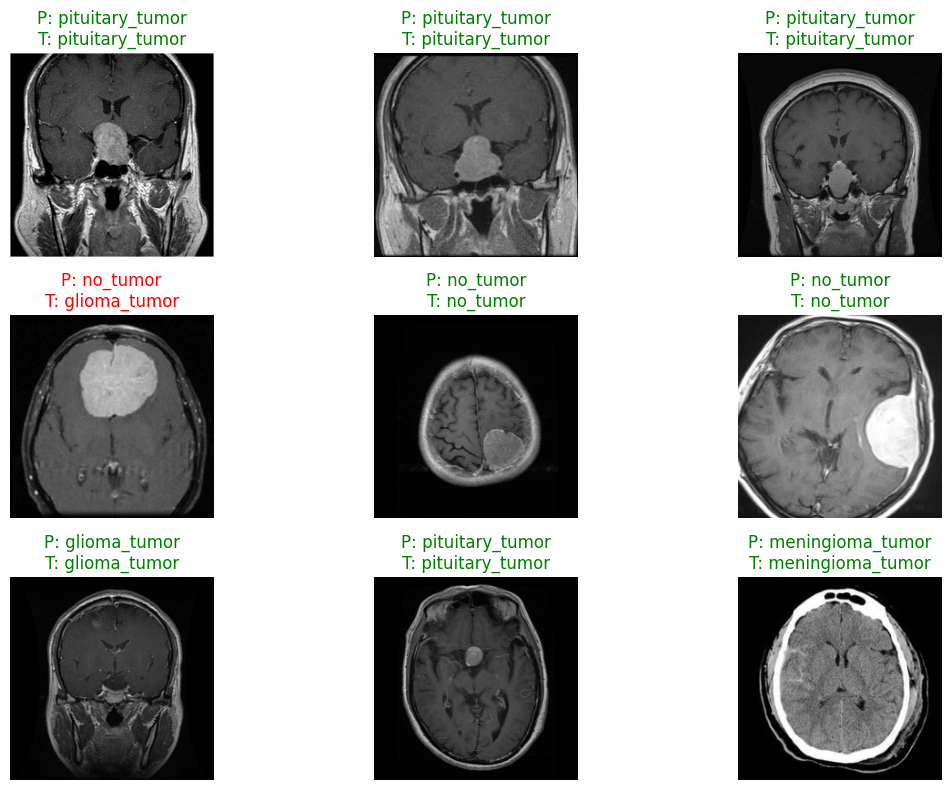

In [29]:
plt.figure(figsize=(12, 8))
for i in range(9):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.clip(X_test[idx], 0, 1))
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"P: {pred_label}\nT: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

If YOU Find this notebook Helpful Please Upvote. Thank you!